## Q2.1.1

In [1]:
import pandas as pd
import numpy as np

# Loading data
file_path = "D:/Desktop/Classification iris(2) (1).xlsx"
df = pd.read_excel(file_path)

# features and target 
X = df.iloc[:, 1:-1].values  #  features
y = df.iloc[:, -1].values  #  target

#  ratio between test set and training set
test_size = 0.3

#   obtaining indices from each class
unique_classes = np.unique(y)   
train_indices = []  #   store indices of training set
test_indices = []  #   store indices of test set

# sampling
for cls in unique_classes:
    # obtaining indices of current class
    class_indices = np.where(y == cls)[0]
    
    #  number of samples in current class
    n_class_samples = len(class_indices)
    
    #  number of samples in test set
    n_test_samples = int(n_class_samples * test_size)
    
    #  randomly choose samples for test set
    np.random.seed(42)  
    test_class_indices = np.random.choice(class_indices, size=n_test_samples, replace=False)
    
    # getting the indices for training set
    train_class_indices = np.setdiff1d(class_indices, test_class_indices)
    train_indices.extend(train_class_indices)
    test_indices.extend(test_class_indices)

# transfer into the form of lists
train_indices = list(train_indices)
test_indices = list(test_indices)

# output results
print("Q2.1.1 Split training set and test set:")
print(f"Training set: {train_indices}")
print(f"Test set: {test_indices}")


Q2.1.1 Split training set and test set:
Training set: [0, 1, 2, 5, 6, 7, 9, 10, 11, 14, 15, 16, 18, 20, 21, 22, 23, 24, 27, 28, 29, 31, 33, 34, 35, 36, 38, 40, 41, 42, 43, 44, 46, 47, 49, 50, 51, 52, 55, 56, 57, 59, 60, 61, 64, 65, 66, 68, 70, 71, 72, 73, 74, 77, 78, 79, 81, 83, 84, 85, 86, 88, 90, 91, 92, 93, 94, 96, 97, 99, 100, 101, 102, 105, 106, 107, 109, 110, 111, 114, 115, 116, 118, 120, 121, 122, 123, 124, 127, 128, 129, 131, 133, 134, 135, 136, 138, 140, 141, 142, 143, 144, 146, 147, 149]
Test set: [13, 39, 30, 45, 17, 48, 26, 25, 32, 19, 12, 4, 37, 8, 3, 63, 89, 80, 95, 67, 98, 76, 75, 82, 69, 62, 54, 87, 58, 53, 113, 139, 130, 145, 117, 148, 126, 125, 132, 119, 112, 104, 137, 108, 103]


## Q2.1.2

In [2]:
# Compute the mean vector and covariance matrix using the training set
X_train = X[train_indices]

# Calculate the mean vector
mean_vector = np.mean(X_train, axis=0)

# Calculate the covariance matrix with N as the normalization factor
covariance_matrix = np.cov(X_train, rowvar=False, bias=True)

# Perform SVD decomposition
U, S, Vt = np.linalg.svd(covariance_matrix)

# Output results
print("Q2.1.2 SVD Decomposition:")
print(f"Mean vector: {mean_vector}")
print(f"Covariance matrix:\n{covariance_matrix}")
print(f"Eigenvalues (vector): {S}")
print(f"Eigenvectors (matrix):\n{U}")


Q2.1.2 SVD Decomposition:
Mean vector: [5.85333333 3.09333333 3.77238095 1.22190476]
Covariance matrix:
[[ 0.67563175 -0.03697778  1.23366349  0.50102222]
 [-0.03697778  0.18176508 -0.34275556 -0.12671111]
 [ 1.23366349 -0.34275556  3.11514195  1.2981288 ]
 [ 0.50102222 -0.12671111  1.2981288   0.58475828]]
Eigenvalues (vector): [4.20119588 0.2549115  0.07710315 0.02408652]
Eigenvectors (matrix):
[[-0.35273742 -0.71299298  0.52246473  0.30699825]
 [ 0.08786219 -0.66993843 -0.64174171 -0.36280892]
 [-0.85908545  0.18759342 -0.0454559  -0.47404079]
 [-0.36031756  0.08736258 -0.55958193  0.74122001]]


## Q2.1.3

In [3]:
def pca_projection(X_centered, num_components=1):
    # Compute the covariance matrix
    covariance_matrix = np.cov(X_centered, rowvar=False, bias=True)
    
    # Perform SVD decomposition on the covariance matrix
    U, S, Vt = np.linalg.svd(covariance_matrix)
    
    # Select the first num_components principal components
    W = U[:, :num_components]
    
    # Project the data onto the subspace
    X_mapped = X_centered.dot(W)
    
    return W, X_mapped, S

def calculate_variance(X_centered, W):
    """Calculate the variance of the given projection matrix W"""
    X_projected = X_centered.dot(W)
    variance = np.var(X_projected, axis=0)
    return np.sum(variance)

def calculate_reconstruction_loss(X_centered, W, X_original):
    """Calculate the reconstruction loss for the given projection matrix W"""
    X_projected = X_centered.dot(W)
    X_reconstructed = X_projected.dot(W.T)  # Reconstruct from the lower-dimensional space back to the original space
    reconstruction_loss = np.mean((X_original - X_reconstructed) ** 2)
    return reconstruction_loss

# Center the training and test sets
X_train_centered = X_train - np.mean(X_train, axis=0)
X_test_centered = X[test_indices] - np.mean(X_train, axis=0)  # Center using the training set mean

# Perform PCA on the training and test sets
W_train, X_train_mapped, _ = pca_projection(X_train_centered, num_components=1)
W_test, X_test_mapped, _ = pca_projection(X_test_centered, num_components=1)

# Calculate variance and reconstruction loss
train_variance = calculate_variance(X_train_centered, W_train)
test_variance = calculate_variance(X_test_centered, W_test)

train_reconstruction_loss = calculate_reconstruction_loss(X_train_centered, W_train, X_train_centered)
test_reconstruction_loss = calculate_reconstruction_loss(X_test_centered, W_test, X_test_centered)

# Output the results
print("Q2.1.3 Project onto 1-dimensional subspace and reconstruct:")
print(f"Projection matrix W:\n{W_train}")
print(f"Shape of X_train mapped: {X_train_mapped.shape}, shape of X_train reconstruction: {X_train_centered.shape}")
print(f"Variance train: {train_variance}")
print(f"Reconstruction loss train: {train_reconstruction_loss}")
print(f"Shape of X_test mapped: {X_test_mapped.shape}, shape of X_test reconstruction: {X_test_centered.shape}")
print(f"Variance test: {test_variance}")
print(f"Reconstruction loss test: {test_reconstruction_loss}")


Q2.1.3 Project onto 1-dimensional subspace and reconstruct:
Projection matrix W:
[[-0.35273742]
 [ 0.08786219]
 [-0.85908545]
 [-0.36031756]]
Shape of X_train mapped: (105, 1), shape of X_train reconstruction: (105, 4)
Variance train: 4.201195884267425
Reconstruction loss train: 0.08902529197169233
Shape of X_test mapped: (45, 1), shape of X_test reconstruction: (45, 4)
Variance test: 4.186300945824711
Reconstruction loss test: 0.07812100891853516


## Q2.1.4

In [4]:
# Perform PCA on the training and test sets, selecting 2 principal components
W_train_2, X_train_mapped_2, _ = pca_projection(X_train_centered, num_components=2)
W_test_2, X_test_mapped_2, _ = pca_projection(X_test_centered, num_components=2)

# Calculate variance and reconstruction loss
train_variance_2 = calculate_variance(X_train_centered, W_train_2)
test_variance_2 = calculate_variance(X_test_centered, W_test_2)

train_reconstruction_loss_2 = calculate_reconstruction_loss(X_train_centered, W_train_2, X_train_centered)
test_reconstruction_loss_2 = calculate_reconstruction_loss(X_test_centered, W_test_2, X_test_centered)

# Output results
print("Q2.1.4 Project onto 2-dimensional subspace and reconstruct:")
print(f"Projection matrix W:\n{W_train_2}")
print(f"Shape of X_train mapped: {X_train_mapped_2.shape}, shape of X_train reconstruction: {X_train_centered.shape}")
print(f"Variance train: {train_variance_2}")
print(f"Reconstruction loss train: {train_reconstruction_loss_2}")
print(f"Shape of X_test mapped: {X_test_mapped_2.shape}, shape of X_test reconstruction: {X_test_centered.shape}")
print(f"Variance test: {test_variance_2}")
print(f"Reconstruction loss test: {test_reconstruction_loss_2}")



Q2.1.4 Project onto 2-dimensional subspace and reconstruct:
Projection matrix W:
[[-0.35273742 -0.71299298]
 [ 0.08786219 -0.66993843]
 [-0.85908545  0.18759342]
 [-0.36031756  0.08736258]]
Shape of X_train mapped: (105, 2), shape of X_train reconstruction: (105, 4)
Variance train: 4.456107386408389
Reconstruction loss train: 0.0252974164364513
Shape of X_test mapped: (45, 2), shape of X_test reconstruction: (45, 4)
Variance test: 4.392589368020426
Reconstruction loss test: 0.023037201552146048


## Q2.1.5

In [5]:
# conducting PCA, choose 3 principal components
W_train_3, X_train_mapped_3, _ = pca_projection(X_train_centered, num_components=3)
W_test_3, X_test_mapped_3, _ = pca_projection(X_test_centered, num_components=3)

# compute variance and reconstruction loss
train_variance_3 = calculate_variance(X_train_centered, W_train_3)
test_variance_3 = calculate_variance(X_test_centered, W_test_3)

train_reconstruction_loss_3 = calculate_reconstruction_loss(X_train_centered, W_train_3, X_train_centered)
test_reconstruction_loss_3 = calculate_reconstruction_loss(X_test_centered, W_test_3, X_test_centered)

# output results
print("Q2.1.5 Project onto 3-dimensional subspace and reconstruct:")
print(f"Project matrix W:\n{W_train_3}")
print(f"shape of X_train mapped: {X_train_mapped_3.shape}, shape of X_train reconstruct: {X_train_centered.shape}")
print(f"Variance train: {train_variance_3}")
print(f"Reconstruction loss train: {train_reconstruction_loss_3}")
print(f"shape of X_test mapped: {X_test_mapped_3.shape}, shape of X_test reconstruct: {X_test_centered.shape}")
print(f"Variance test: {test_variance_3}")
print(f"Reconstruction loss test: {test_reconstruction_loss_3}")


Q2.1.5 Project onto 3-dimensional subspace and reconstruct:
Project matrix W:
[[-0.35273742 -0.71299298  0.52246473]
 [ 0.08786219 -0.66993843 -0.64174171]
 [-0.85908545  0.18759342 -0.0454559 ]
 [-0.36031756  0.08736258 -0.55958193]]
shape of X_train mapped: (105, 3), shape of X_train reconstruct: (105, 4)
Variance train: 4.533210536959365
Reconstruction loss train: 0.006021628798707242
shape of X_test mapped: (45, 3), shape of X_test reconstruct: (45, 4)
Variance test: 4.457756200142843
Reconstruction loss test: 0.004921673150668068


## Q2.1.6

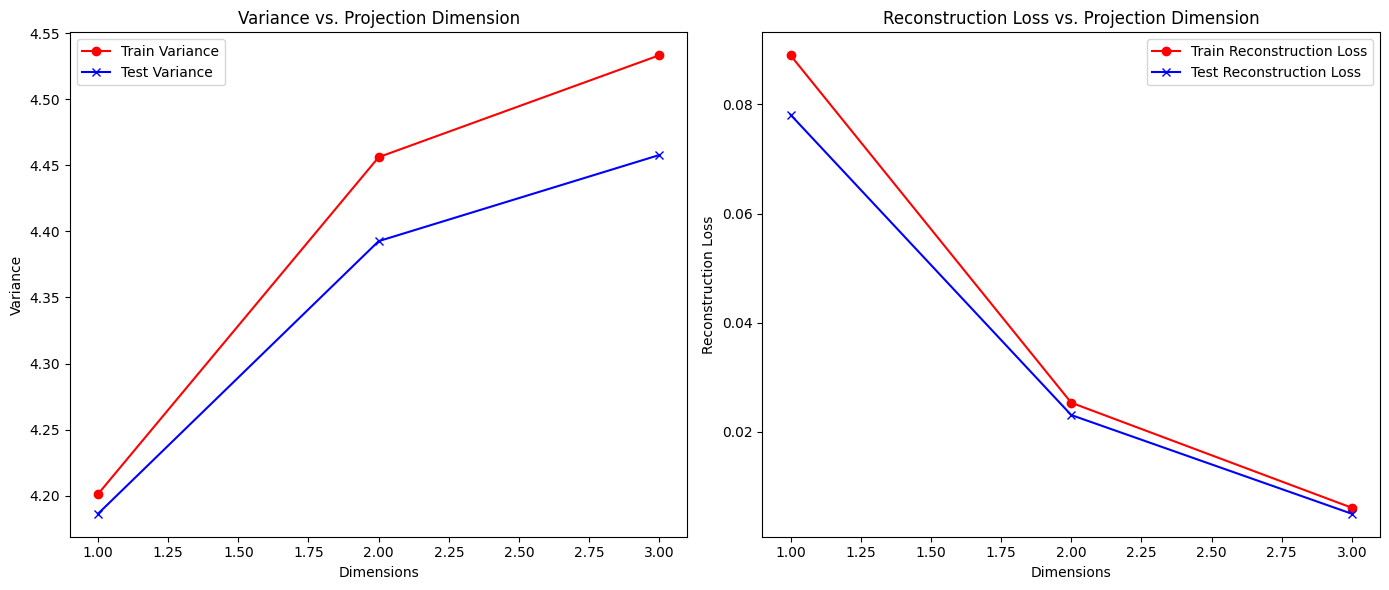

In [6]:
import matplotlib.pyplot as plt

def plot_variance_and_reconstruction_loss():
    dimensions = [1, 2, 3]
    train_variances = [train_variance, train_variance_2, train_variance_3]
    test_variances = [test_variance, test_variance_2, test_variance_3]
    train_reconstruction_losses = [train_reconstruction_loss, train_reconstruction_loss_2, train_reconstruction_loss_3]
    test_reconstruction_losses = [test_reconstruction_loss, test_reconstruction_loss_2, test_reconstruction_loss_3]

    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    # variance figure
    ax[0].plot(dimensions, train_variances, label='Train Variance', color='red', marker='o')
    ax[0].plot(dimensions, test_variances, label='Test Variance', color='blue', marker='x')
    ax[0].set_title("Variance vs. Projection Dimension")
    ax[0].set_xlabel("Dimensions")
    ax[0].set_ylabel("Variance")
    ax[0].legend()

    # reconstruction loss figure
    ax[1].plot(dimensions, train_reconstruction_losses, label='Train Reconstruction Loss', color='red', marker='o')
    ax[1].plot(dimensions, test_reconstruction_losses, label='Test Reconstruction Loss', color='blue', marker='x')
    ax[1].set_title("Reconstruction Loss vs. Projection Dimension")
    ax[1].set_xlabel("Dimensions")
    ax[1].set_ylabel("Reconstruction Loss")
    ax[1].legend()

    plt.tight_layout()
    plt.show()

plot_variance_and_reconstruction_loss()
